In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
from PIL import Image
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [2]:
# Initialize the base ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

In [3]:
# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(3, activation='softmax')(x)  # 3 classes for NASH scores 0, 1, 2

In [4]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [5]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# import pydot
# print(pydot.Dot.create(pydot.Dot()))

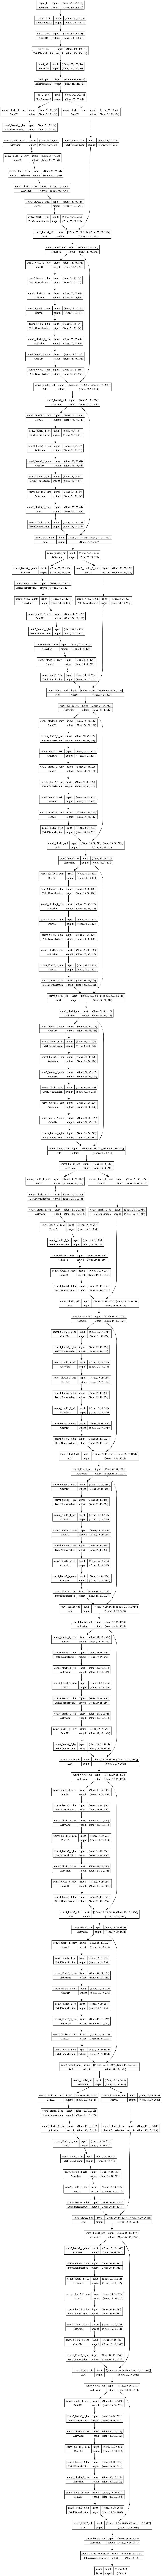

In [7]:
# Visualize the model architecture
plot_model(model, to_file='D:/DATASET/inflammation_model_architecture.png', show_shapes=True, show_layer_names=True)

In [8]:
# Create a model for feature map extraction
feature_model = Model(inputs=base_model.input, outputs=base_model.get_layer('conv5_block3_out').output)

In [9]:
def extract_and_display_image(image_path, feature_model):
    img = Image.open(image_path)
    img_resized = img.resize((299, 299), Image.ANTIALIAS)
    img_array = np.array(img_resized) / 255.0
    img_array = img_array[np.newaxis, ...]

    # Display the original image
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Get the feature maps
    feature_maps = feature_model.predict(img_array)[0]
    return feature_maps

In [10]:
def visualize_feature_maps(feature_maps, num_features=15):
    # Display the first 'num_features' feature maps
    fig, axes = plt.subplots(nrows=int(np.sqrt(num_features)), ncols=int(np.sqrt(num_features)), figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        if i < num_features:
            ax.imshow(feature_maps[:, :, i], cmap='viridis')
            ax.axis('off')
    plt.show()

In [11]:
# Load images using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [12]:
train_generator = train_datagen.flow_from_directory(
    'D:/DATASET/CNN/inflammation/train',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    'D:/DATASET/CNN/inflammation/val',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 7787 images belonging to 3 classes.
Found 98 images belonging to 3 classes.


In [13]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  
)

# Save the model
model.save('D:/DATASET/Models/model_inflammation.h5')

Epoch 1/10
243/243 [==============================] - 3992s 16s/step - loss: 0.6827 - accuracy: 0.7577 - val_loss: 1.1477 - val_accuracy: 0.1458
Epoch 2/10
243/243 [==============================] - 8631s 36s/step - loss: 0.4873 - accuracy: 0.8123 - val_loss: 1.0615 - val_accuracy: 0.6875
Epoch 3/10
243/243 [==============================] - 3861s 16s/step - loss: 0.4418 - accuracy: 0.8258 - val_loss: 0.9802 - val_accuracy: 0.6875
Epoch 4/10
243/243 [==============================] - 3946s 16s/step - loss: 0.4064 - accuracy: 0.8358 - val_loss: 0.7666 - val_accuracy: 0.7812
Epoch 5/10
243/243 [==============================] - 3966s 16s/step - loss: 0.3750 - accuracy: 0.8473 - val_loss: 1.6755 - val_accuracy: 0.5625
Epoch 6/10
243/243 [==============================] - 3901s 16s/step - loss: 0.3550 - accuracy: 0.8547 - val_loss: 0.8613 - val_accuracy: 0.7188
Epoch 7/10
243/243 [==============================] - 3869s 16s/step - loss: 0.3144 - accuracy: 0.8712 - val_loss: 0.7882 - val_ac

In [1]:
import json

# Save the training history
with open('D:/DATASET/Models/inflammation_history.json', 'w') as file:
    json.dump(history.history, file)

NameError: name 'history' is not defined

In [ ]:
# Function to plot validation loss
def plot_validation_loss(history, model_name):
    plt.plot(history['val_loss'], label=f'{model_name} Validation Loss')
    plt.title(f'{model_name} Validation Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.legend()
    plt.show()

In [ ]:
# Plot validation loss for inflammation model
with open('D:/DATASET/Models/inflammation_history.json', 'r') as file:
    fibrosis_history = json.load(file)

plot_validation_loss(fibrosis_history, 'Inflammation')

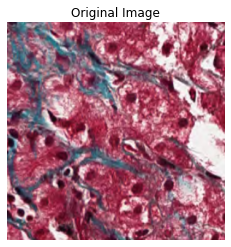

1/1 [==============================] - 0s 120ms/step


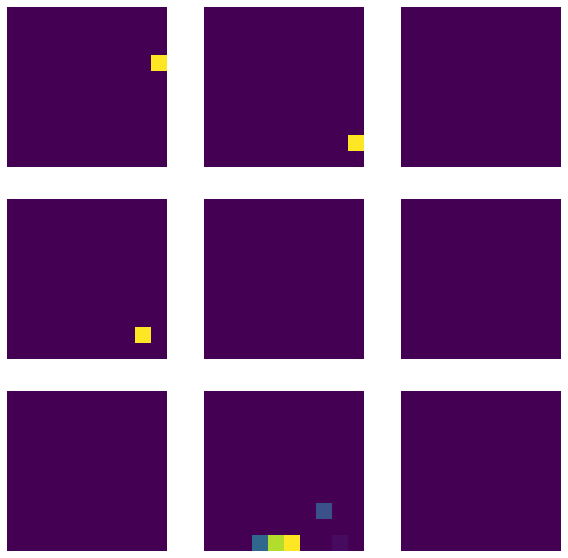

In [22]:
image_path = "D:/DATASET/CNN/inflammation/train/1/2_228_75.png"
feature_maps = extract_and_display_image(image_path, feature_model)
visualize_feature_maps(feature_maps)

In [36]:
# Create a model for feature map extraction
feature_model = Model(inputs=base_model.input, outputs=base_model.get_layer('conv5_block1_out').output)

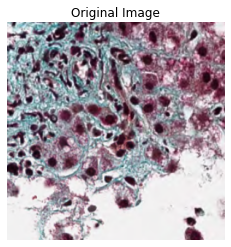

1/1 [==============================] - 1s 859ms/step


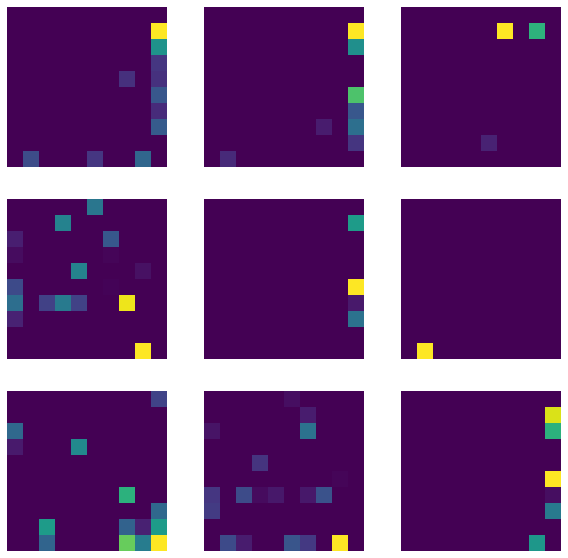

In [37]:
image_path = "D:/DATASET/CNN/inflammation/train/2/168_25_37.png"
feature_maps = extract_and_display_image(image_path, feature_model)
visualize_feature_maps(feature_maps)

In [27]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

def prepare_image(image_path):
    img = load_img(image_path, target_size=(299, 299))  # Ensure the image is resized
    img_array = img_to_array(img)                      # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)      # Add a dimension to fit the model input: (1, 299, 299, 3)
    img_array = preprocess_input(img_array)            # Preprocess the image as required by ResNet50
    return img_array


image_path = "D:/DATASET/CNN/inflammation/train/1/2_228_75.png"
img_array = prepare_image(image_path)

In [28]:
for layer in model.layers:
    print(layer.name)

input_1
conv1_pad
conv1_conv
conv1_bn
conv1_relu
pool1_pad
pool1_pool
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_0_bn
conv2_block1_3_bn
conv2_block1_add
conv2_block1_out
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_3_bn
conv2_block2_add
conv2_block2_out
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
conv2_block3_3_conv
conv2_block3_3_bn
conv2_block3_add
conv2_block3_out
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_0_bn
conv3_block1_3_bn
conv3_block1_add
conv3_block1_out
conv3_block2_1_conv
conv3_block2_1_bn
conv3_block2_1_relu
conv3_block2_2_conv
conv3_block2_2_bn
conv3_

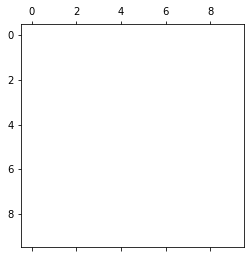

In [30]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.cm as cm
import tensorflow as tf

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Use the function
# img_array should be your preprocessed image input to the model
# 'last_conv_layer' should be the name of the last convolutional layer in your model
# model is your trained model
heatmap = make_gradcam_heatmap(prepare_image('D:/DATASET/CNN/inflammation/train/1/2_228_75.png'), model, 'conv5_block3_3_conv')
plt.matshow(heatmap)
plt.show()

In [ ]:
# To use the model later without retraining:
# from tensorflow.keras.models import load_model
# model = load_model('liver_biopsy_classification_model.h5')

In [ ]:
# Improve prediction function as follows
def predict_inflammation(image_path, model):
    img = Image.open(image_path)
    img = img.resize((299, 299), Image.ANTIALIAS)  # Resize the image to match model's input
    img_array = np.array(img) / 255.0  # Rescale the image
    img_array = img_array[np.newaxis, ...]  # Add batch dimension

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    return predicted_class, confidence

In [ ]:
# Example use of the prediction function
predicted_class, confidence = predict_inflammation('D:/DATASET/CNN/inflammation/test/1/417_256_91.png', model)
print(f'Predicted class: {predicted_class} with probability: {confidence:.2f}')

In [ ]:
def crop_and_predict(image_path, model, size=(299, 299), step_size=299):
    img = Image.open(image_path)
    width, height = img.size
    scores = []

    for top in range(0, height - size[1] + 1, step_size):
        for left in range(0, width - size[0] + 1, step_size):
            # Crop the image
            crop = img.crop((left, top, left + size[0], top + size[1]))
            # Preprocess and predict
            crop_array = np.array(crop) / 255.0
            crop_array = crop_array[np.newaxis, ...]
            prediction = model.predict(crop_array)
            scores.append(np.argmax(prediction))

    # Calculate the average score
    average_score = np.mean(scores)
    return int(round(average_score))

In [ ]:
# Use this function to get an average inflammation score from a large image
average_inflammation_score = crop_and_predict("D:/Testing (Triya ma'am)/Hematoxylin eosin staining for scoring at 20X and 40x/NASH_40X/x1.jpg", model)
print(f'Average Inflammation Score: {average_inflammation_score}')